In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nadia =  cv2. imread('D:/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/Nadia_Murad.jpg')
denis = cv2. imread('D:/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/Denis_Mukwege.jpg')
solvay = cv2. imread('D:/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/solvay_conference.jpg')

In [3]:
face_cascade = cv2.CascadeClassifier('D:/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [4]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    return face_img

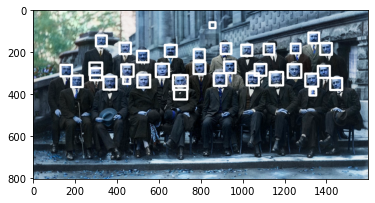

In [5]:
result = detect_face(solvay)
plt.imshow(result)

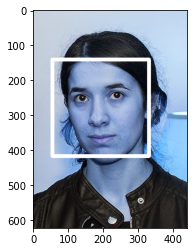

In [6]:
result = detect_face(nadia)
plt.imshow(result)

In [7]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor = 1.2,minNeighbors = 5)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    return face_img

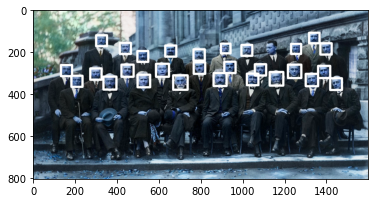

In [8]:
result = adj_detect_face(solvay)
plt.imshow(result)

In [11]:
eye_cascade = cv2.CascadeClassifier('D:/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_eye.xml')

In [12]:
def detect_eyes(img):
    eye_img = img.copy()
    eye_rect = eye_cascade.detectMultiScale(eye_img,scaleFactor = 1.2)
    for (x,y,w,h) in eye_rect:
        cv2.rectangle(eye_img,(x,y),(x+w,y+h),(255,255,255),10)
    return eye_img

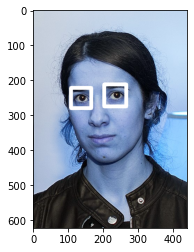

In [13]:
result = detect_eyes(nadia)
plt.imshow(result)

In [16]:
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()
    frame = detect_face(frame)
    cv2.imshow('video face detect',frame)
    k = cv2.waitKey(1)
    if k == 27:
        break
            
cap.release()
cv2.destroyAllWindows()

In [15]:
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()
    frame = detect_eyes(frame)
    cv2.imshow('video eye detect',frame)
    if cv2.waitKey(1) == 27:
        break
cap.release()
cv2.destroyAllWindows()